In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%config InlineBackend.figure_format='retina'
beautydf = pd.read_csv("/Users/nidhipatil/Documents/profs.csv")
beautydf

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5
...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,32,male,more,1.231394,3.2,lower,yes,yes,9,21,93
459,no,32,male,more,1.231394,4.3,upper,yes,yes,52,86,93
460,yes,42,female,more,0.420400,3.3,upper,no,yes,52,67,94
461,yes,42,female,more,0.420400,3.2,upper,no,yes,54,66,94


In [2]:
beautydf.describe()

,age,beauty,eval,students,allstudents,prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.263499e-08,3.998272,36.624190,55.177106,45.434125
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000


In [3]:
beautydf.gender.value_counts()

gender
male      268
female    195
Name: count, dtype: int64

Text(0, 0.5, 'Count of Professors')

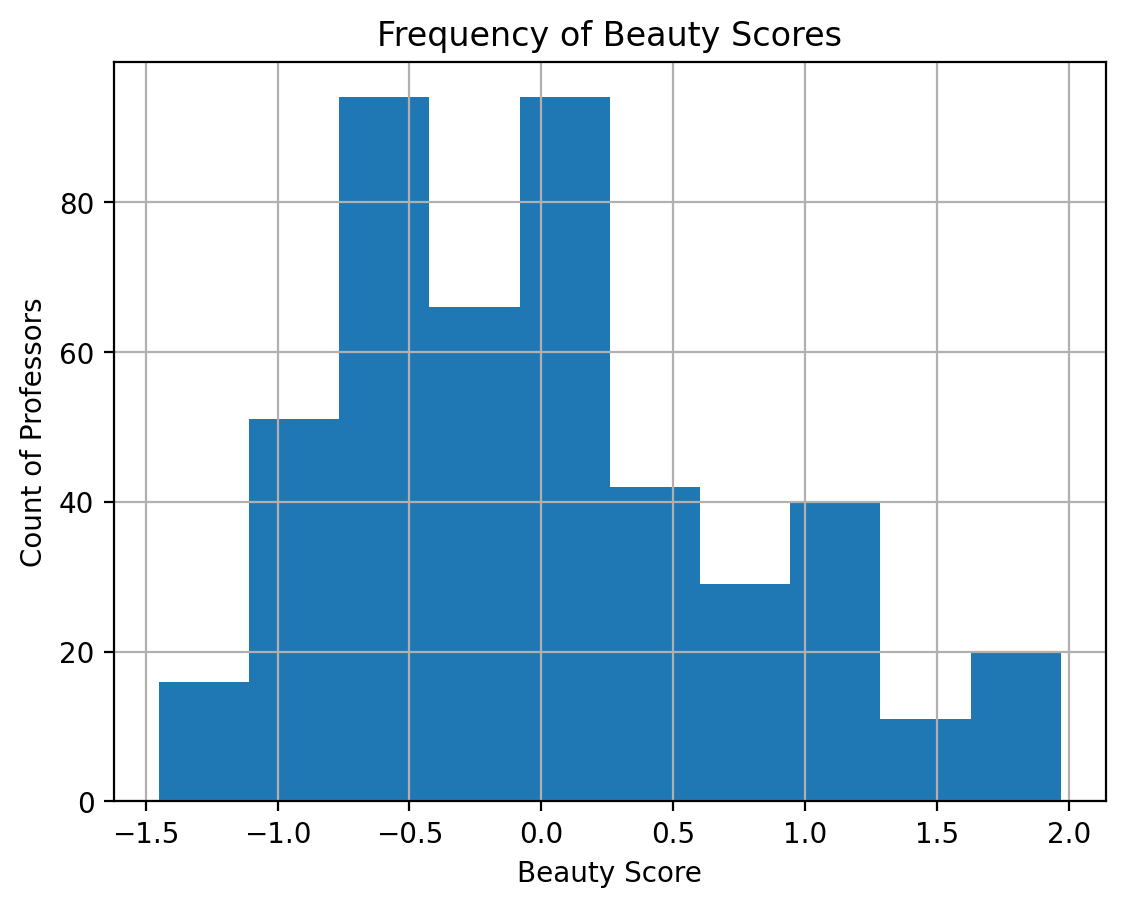

In [4]:
beautydf.beauty.hist()
plt.title("Frequency of Beauty Scores")
plt.xlabel("Beauty Score")
plt.ylabel("Count of Professors")

Text(0, 0.5, 'Count of Professors')

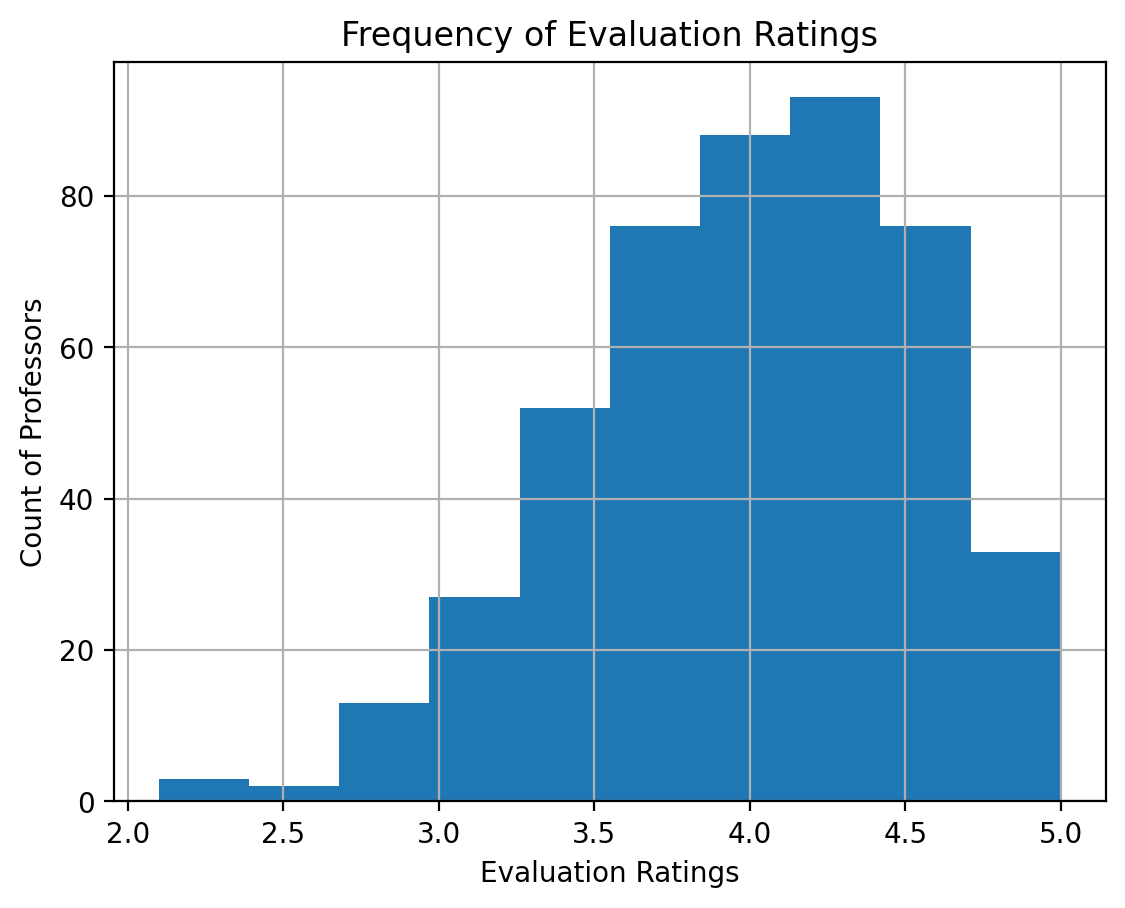

In [5]:
beautydf["eval"].hist()
plt.title("Frequency of Evaluation Ratings")
plt.xlabel("Evaluation Ratings")
plt.ylabel("Count of Professors")

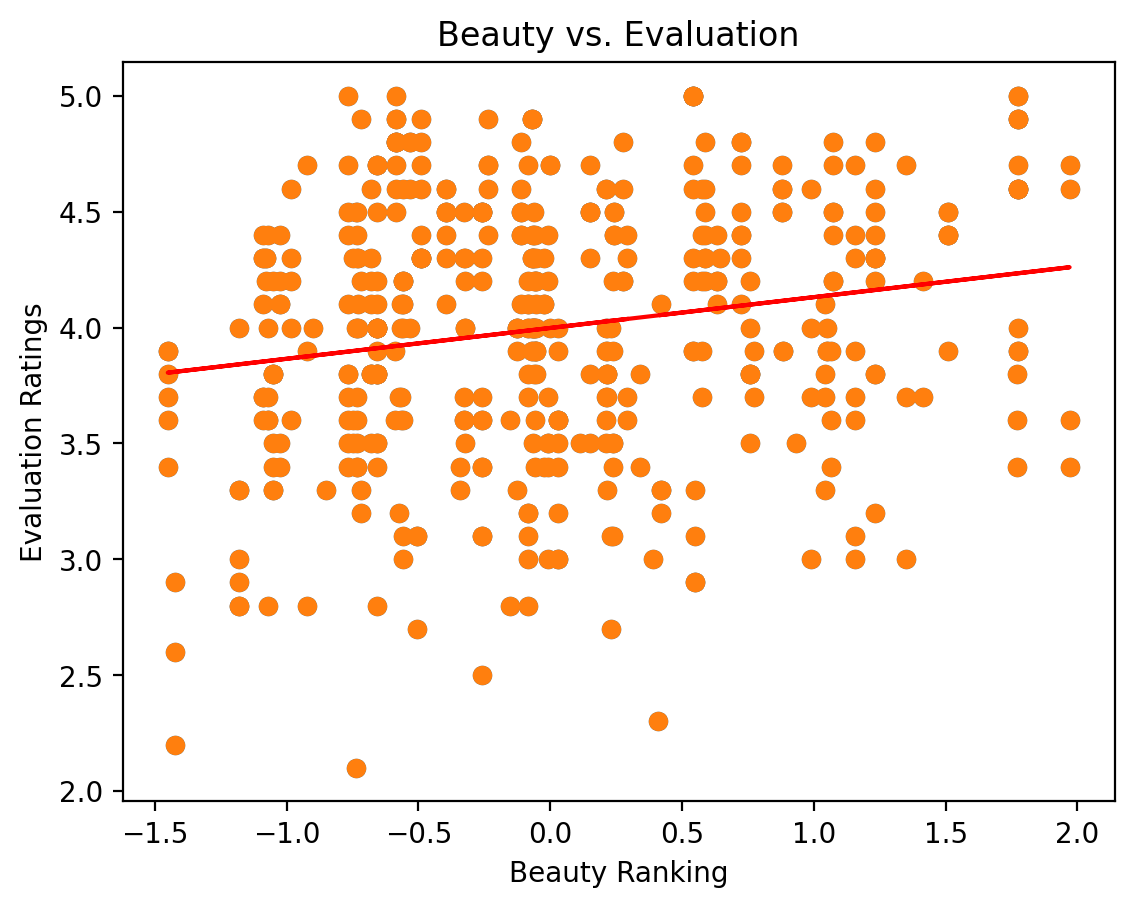

In [15]:
plt.scatter(x=beautydf["beauty"], y=beautydf["eval"])
plt.title("Beauty vs. Evaluation")
plt.xlabel("Beauty Ranking")
plt.ylabel("Evaluation Ratings")
X = beautydf["beauty"].values.reshape(-1, 1)
Y = beautydf["eval"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


In [17]:
femalebeautydf = beautydf.loc[beautydf["gender"] == "female"]
malebeautydf = beautydf.loc[beautydf["gender"] == "male"]

In [19]:
femalebeautydf.sample(10)
malebeautydf.sample(10)


,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
314,no,57,male,more,0.631834,4.4,upper,yes,yes,72,88,52
228,no,63,male,more,-0.010208,4.4,upper,yes,no,14,18,31
235,no,39,male,more,0.576681,4.6,upper,yes,yes,12,15,33
457,no,32,male,more,1.231394,4.5,lower,yes,yes,76,101,93
66,no,50,male,more,1.415695,4.2,upper,yes,yes,15,16,67
204,no,64,male,more,-0.111122,4.6,upper,yes,yes,22,47,24
44,no,61,male,more,0.241818,4.5,lower,yes,yes,22,27,45
429,no,58,male,more,1.774334,4.9,lower,yes,no,18,21,85
136,no,47,male,more,0.540917,4.2,upper,yes,no,22,23,10
432,no,58,male,more,1.774334,5.0,lower,yes,no,11,13,85


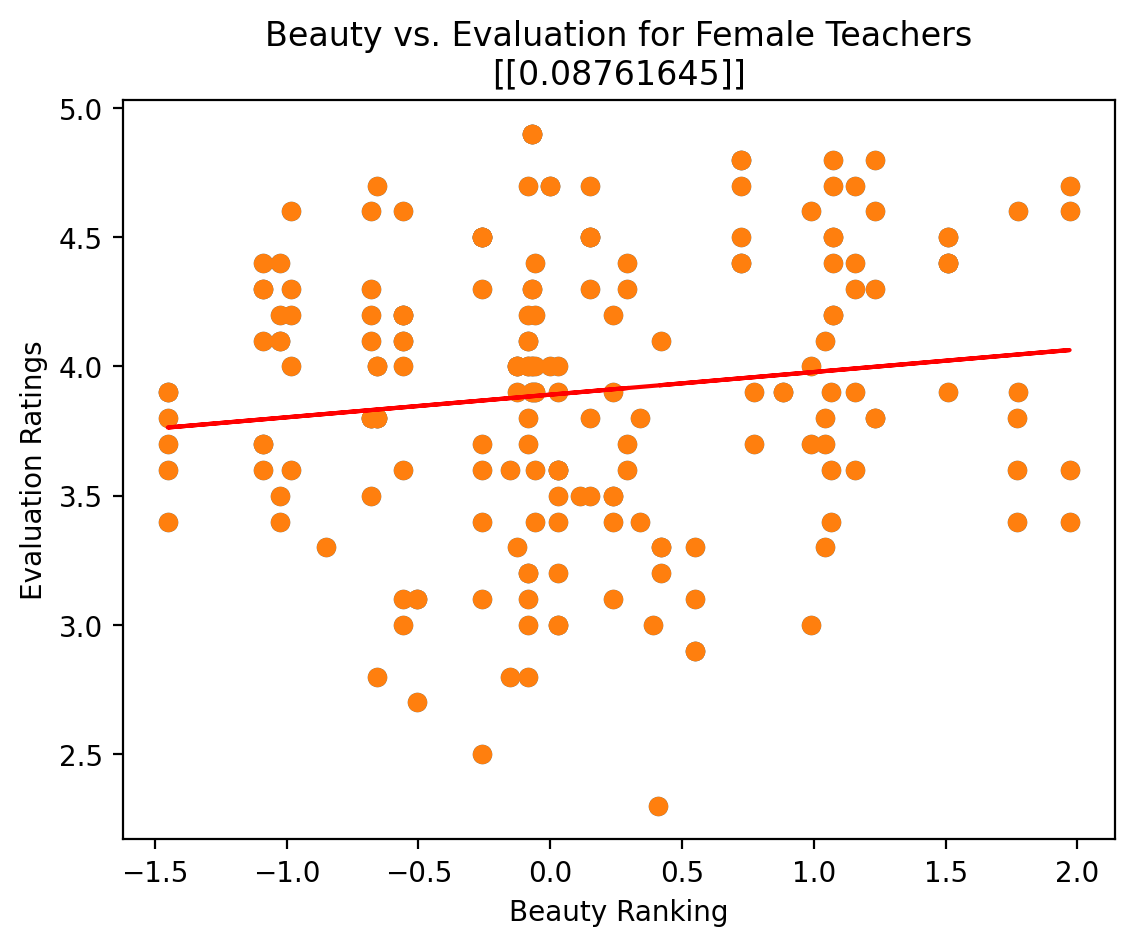

[[0.08761645]]


In [23]:
plt.scatter(x=femalebeautydf["beauty"], y=femalebeautydf["eval"])
plt.title("Beauty vs. Evaluation for Female Teachers\n{}".format(linear_regressor.coef_))
plt.xlabel("Beauty Ranking")
plt.ylabel("Evaluation Ratings")
X = femalebeautydf["beauty"].values.reshape(-1, 1)
Y = femalebeautydf["eval"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print(linear_regressor.coef_)

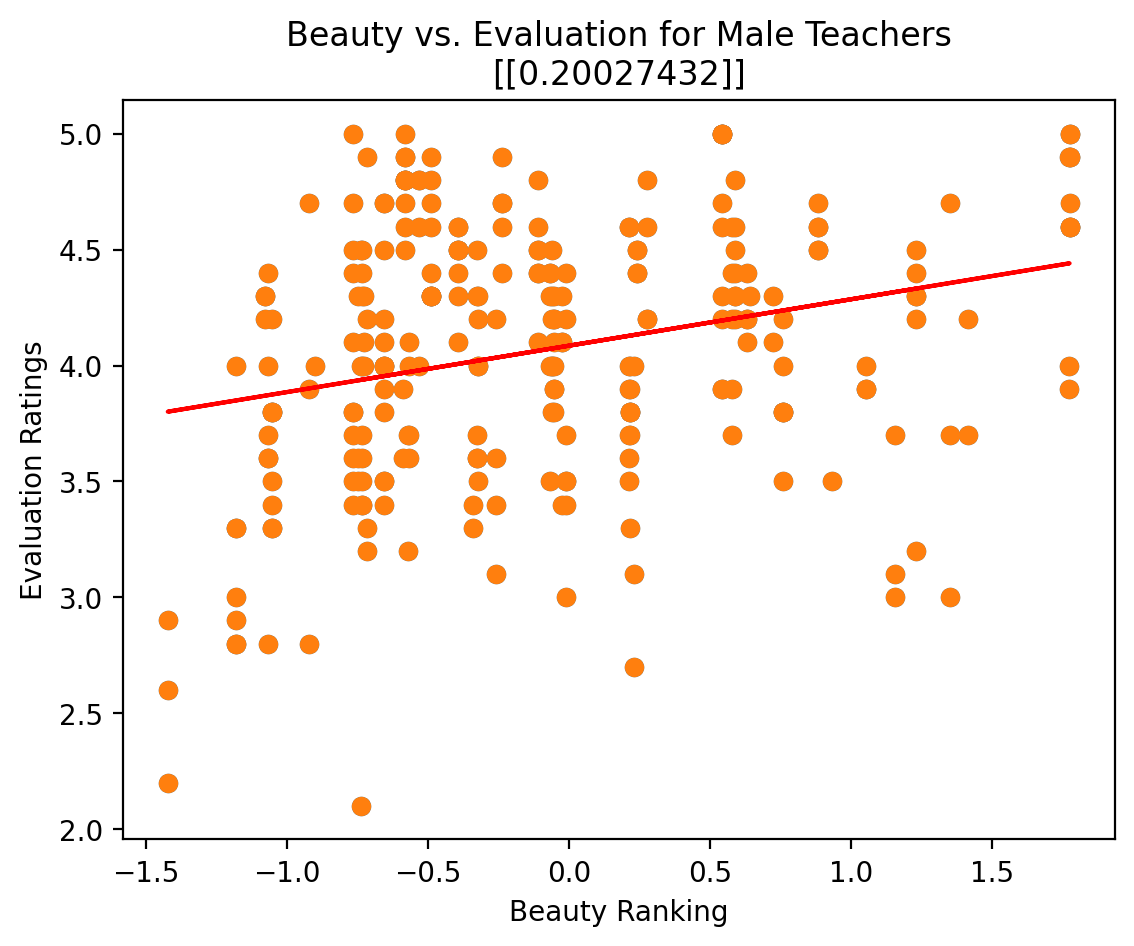

[[0.20027432]]


In [26]:
X = malebeautydf["beauty"].values.reshape(-1, 1)
Y = malebeautydf["eval"].values.reshape(-1, 1)
linear_regressormale = LinearRegression()
linear_regressormale.fit(X, Y)
Y_pred = linear_regressormale.predict(X)
plt.scatter(x=malebeautydf["beauty"], y=malebeautydf["eval"])
plt.title("Beauty vs. Evaluation for Male Teachers\n{}".format(linear_regressormale.coef_))
plt.xlabel("Beauty Ranking")
plt.ylabel("Evaluation Ratings")

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print(linear_regressormale.coef_)

Text(0, 0.5, 'Count of Professors')

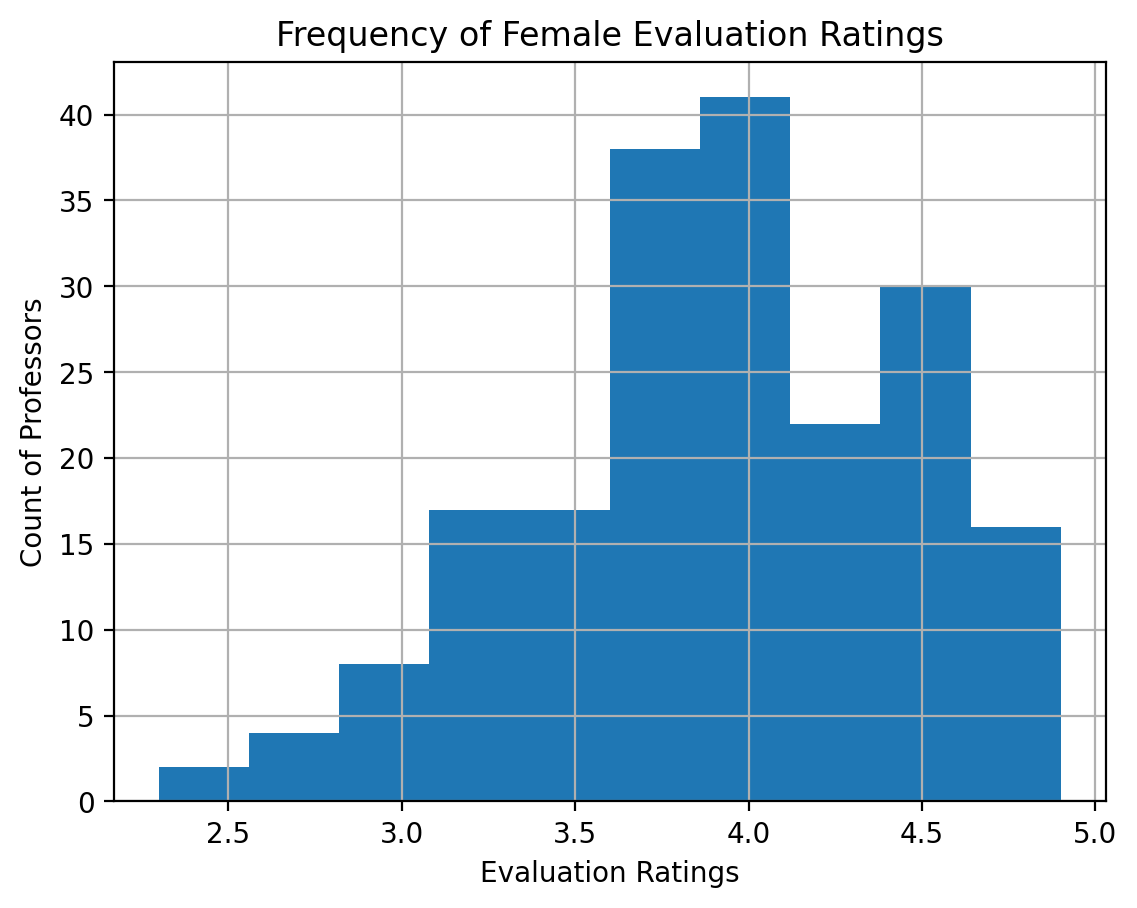

In [28]:
femalebeautydf["eval"].hist()
plt.title("Frequency of Female Evaluation Ratings")
plt.xlabel("Evaluation Ratings")
plt.ylabel("Count of Professors")

Text(0, 0.5, 'Count of Professors')

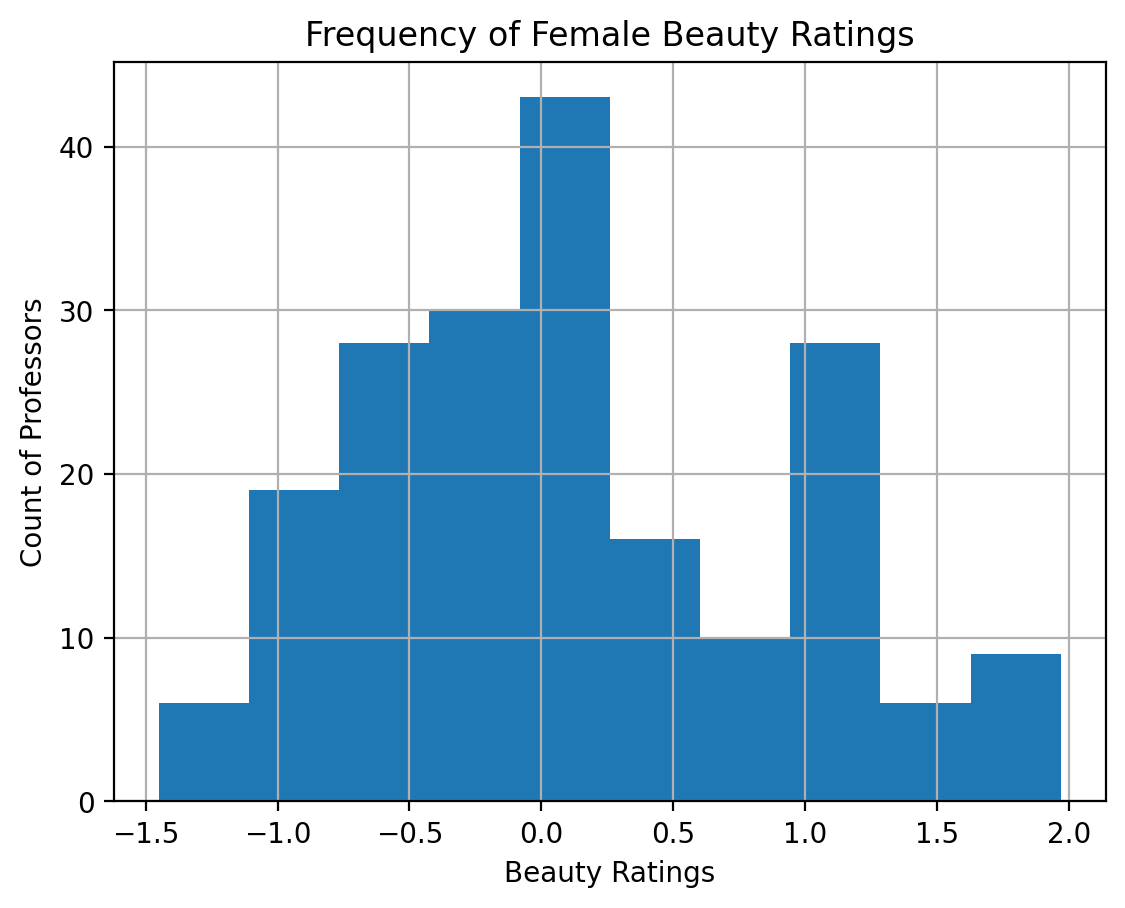

In [29]:
femalebeautydf["beauty"].hist()
plt.title("Frequency of Female Beauty Ratings")
plt.xlabel("Beauty Ratings")
plt.ylabel("Count of Professors")

Text(0, 0.5, 'Count of Professors')

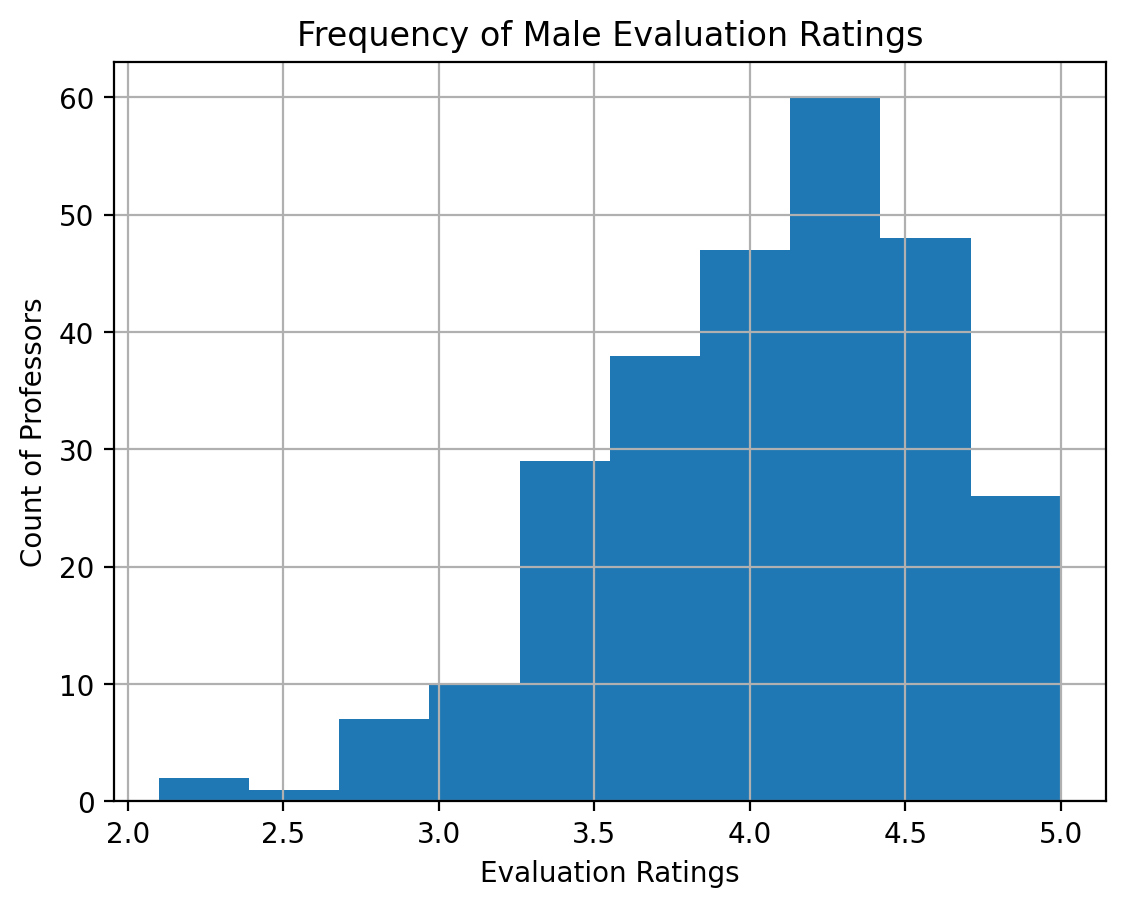

In [30]:
malebeautydf["eval"].hist()
plt.title("Frequency of Male Evaluation Ratings")
plt.xlabel("Evaluation Ratings")
plt.ylabel("Count of Professors")

Text(0, 0.5, 'Count of Professors')

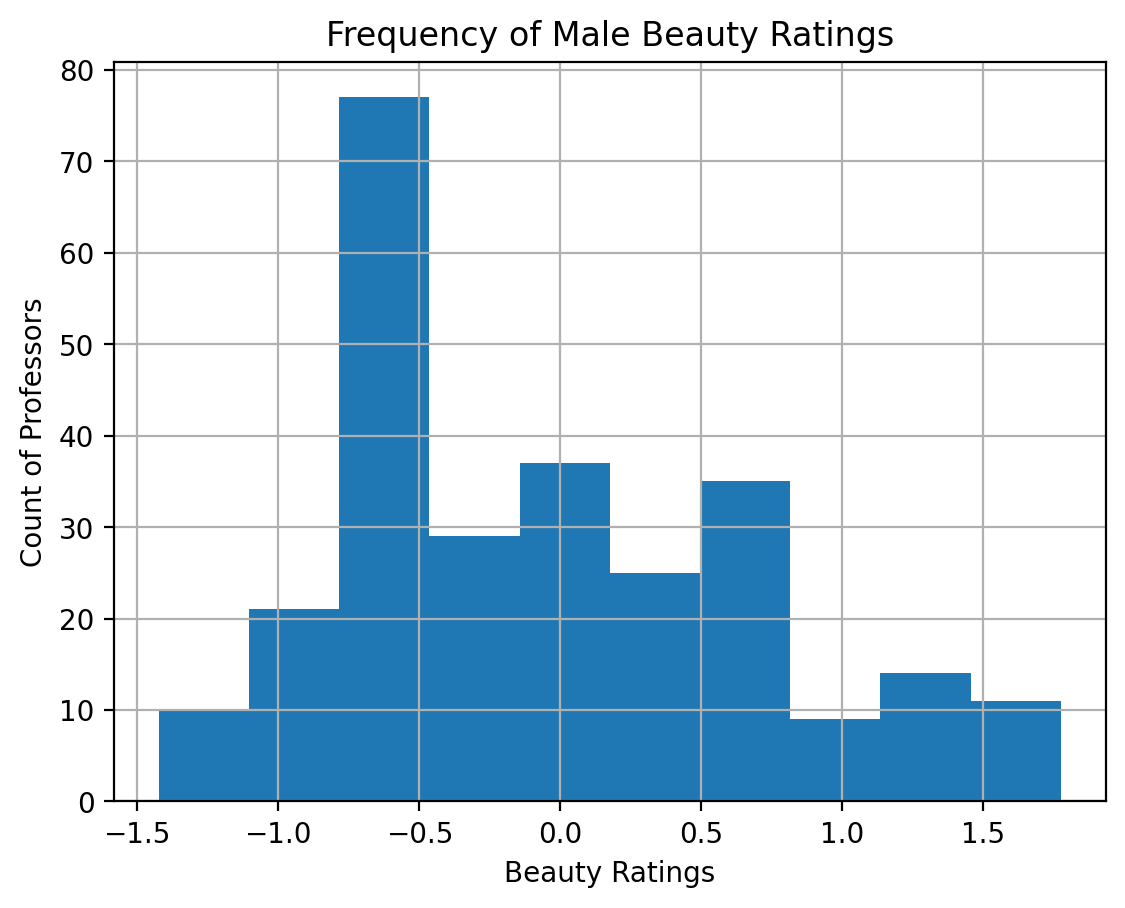

In [31]:
malebeautydf["beauty"].hist()
plt.title("Frequency of Male Beauty Ratings")
plt.xlabel("Beauty Ratings")
plt.ylabel("Count of Professors")

In [34]:
beautydf.loc[beautydf["age"] <= 30, "Age Brackets"] = "< 30"
beautydf.loc[(beautydf["age"] > 30) & (beautydf["age"] <= 45), "Age Brackets"] = "30 - 45"
beautydf.loc[(beautydf["age"] > 45) & (beautydf["age"] <= 65), "Age Brackets"] = "45 - 65"
beautydf.loc[beautydf["age"] > 65, "Age Brackets"] = "> 65"
beautydf


,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,Age Brackets
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,30 - 45
1,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,45 - 65
2,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,45 - 65
3,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,30 - 45
4,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,30 - 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,32,male,more,1.231394,3.2,lower,yes,yes,9,21,93,30 - 45
459,no,32,male,more,1.231394,4.3,upper,yes,yes,52,86,93,30 - 45
460,yes,42,female,more,0.420400,3.3,upper,no,yes,52,67,94,30 - 45
461,yes,42,female,more,0.420400,3.2,upper,no,yes,54,66,94,30 - 45


/var/folders/f3/p9rqty_s5q9chy7fwc8t_6tw0000gn/T/ipykernel_70585/1005862436.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(dataset, labels = ["< 30", "30 - 45", "45 - 65", "> 65"])


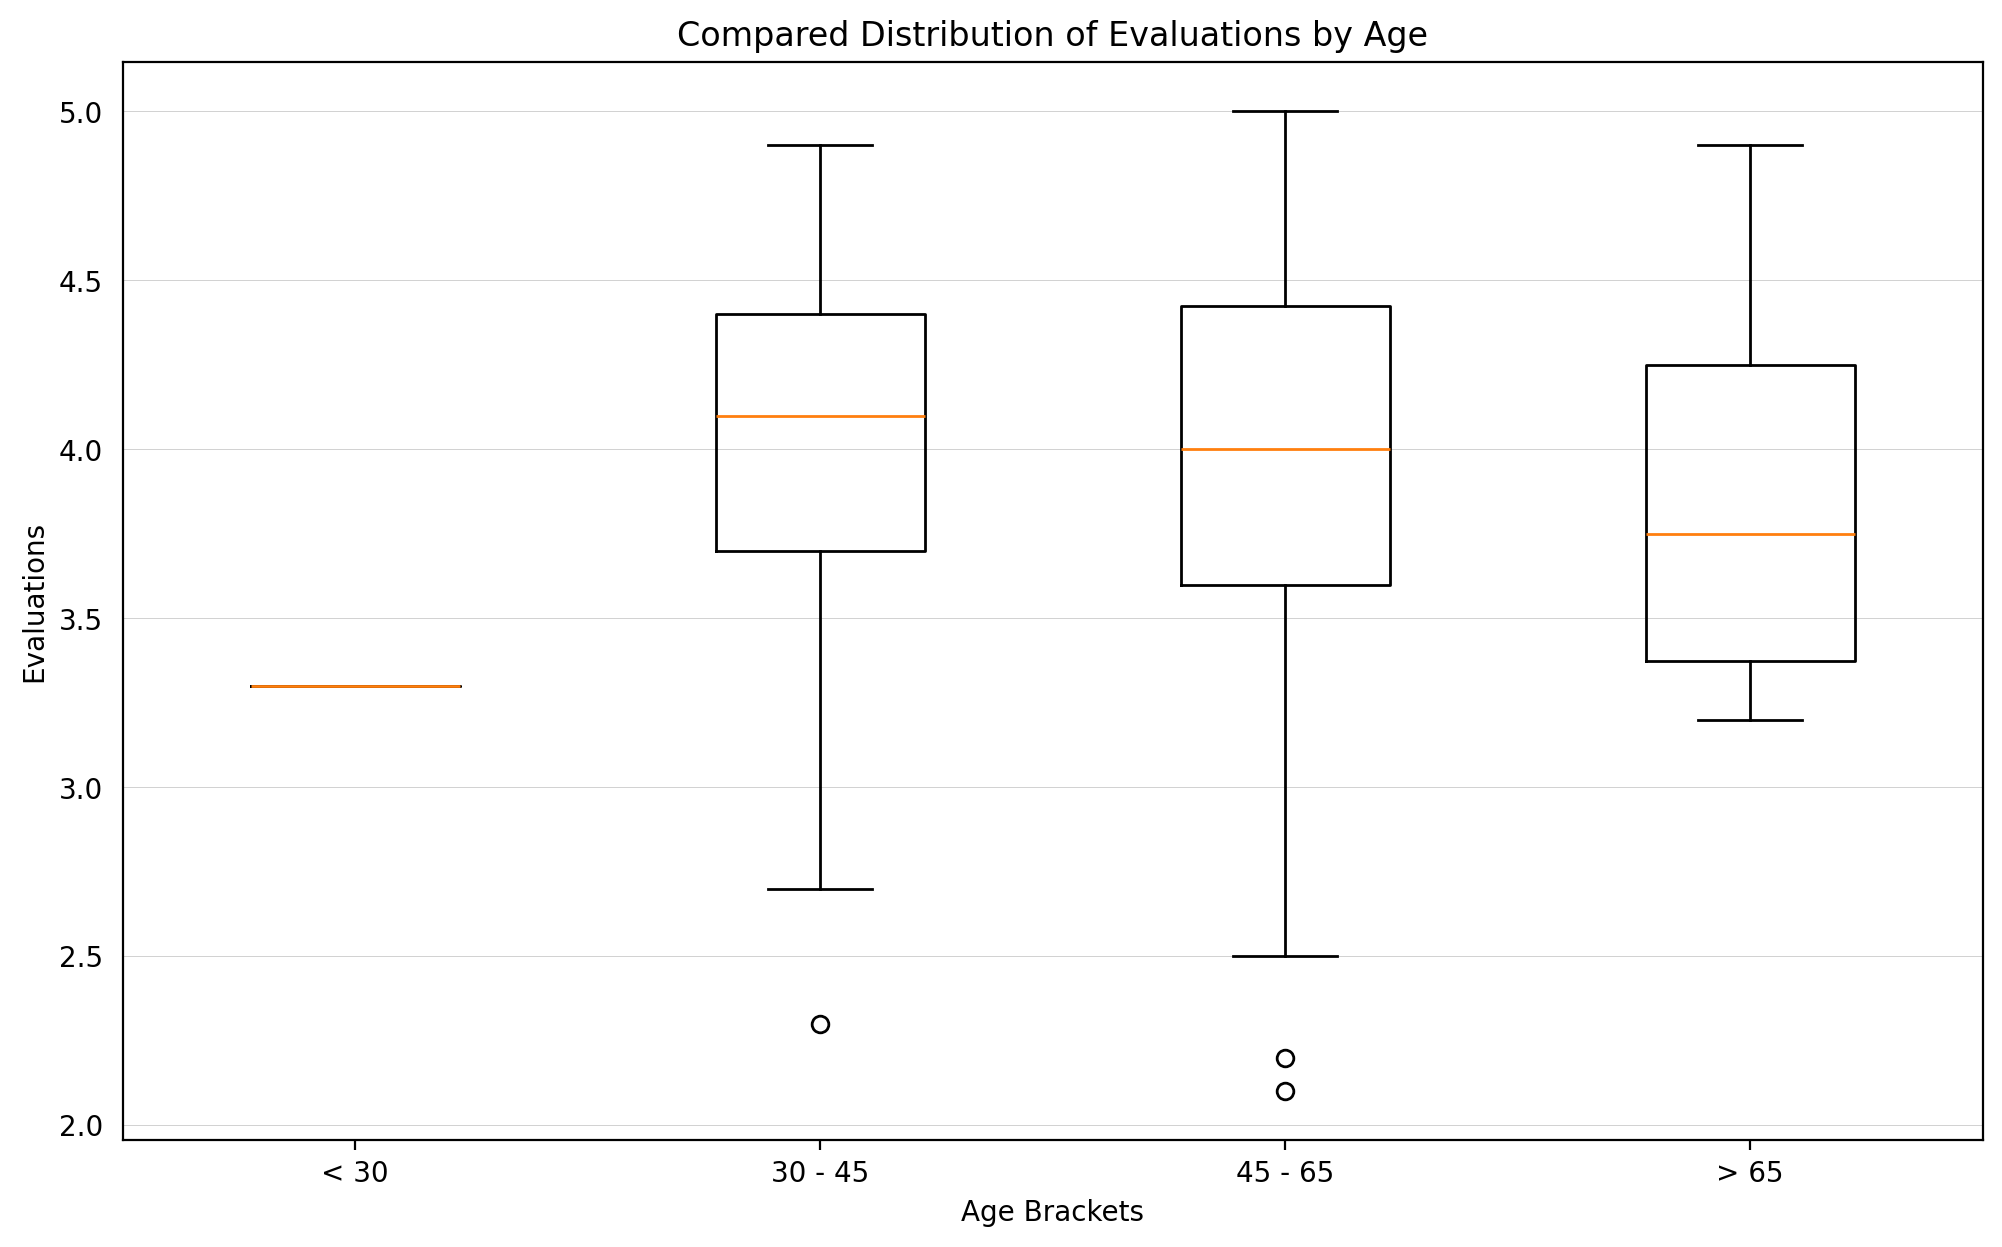

In [44]:

# Prepare energy by genre datasets  
age1 = beautydf.loc[beautydf["Age Brackets"] == "< 30"]["eval"] 
age2 = beautydf.loc[beautydf["Age Brackets"] == "30 - 45"]["eval"]  
age3 = beautydf.loc[beautydf["Age Brackets"] == "45 - 65"]["eval"] 
age4 = beautydf.loc[beautydf["Age Brackets"] == "> 65"]["eval"]  

  
# Visualize petal length distribution for all species  
fig, ax = plt.subplots(figsize=(12, 7))  
  
# Remove y-axis tick marks  
ax.yaxis.set_ticks_position("none")  
# Add major gridlines in the y-axis  
ax.grid(color="grey", axis="y", linestyle="-", linewidth=0.25, alpha=0.5)  
# Set plot title  
ax.set_title("Compared Distribution of Evaluations by Age")  
plt.xlabel("Age Brackets")  
plt.ylabel("Evaluations")  
# Set names as labels for the boxplot  
dataset = [age1, age2, age3, age4]  
labels = beautydf["Age Brackets"].unique()  
ax.boxplot(dataset, labels = ["< 30", "30 - 45", "45 - 65", "> 65"])  
plt.show()  
  

/var/folders/f3/p9rqty_s5q9chy7fwc8t_6tw0000gn/T/ipykernel_70585/1257932217.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(dataset, labels = ["< 30", "30 - 45", "45 - 65", "> 65"])


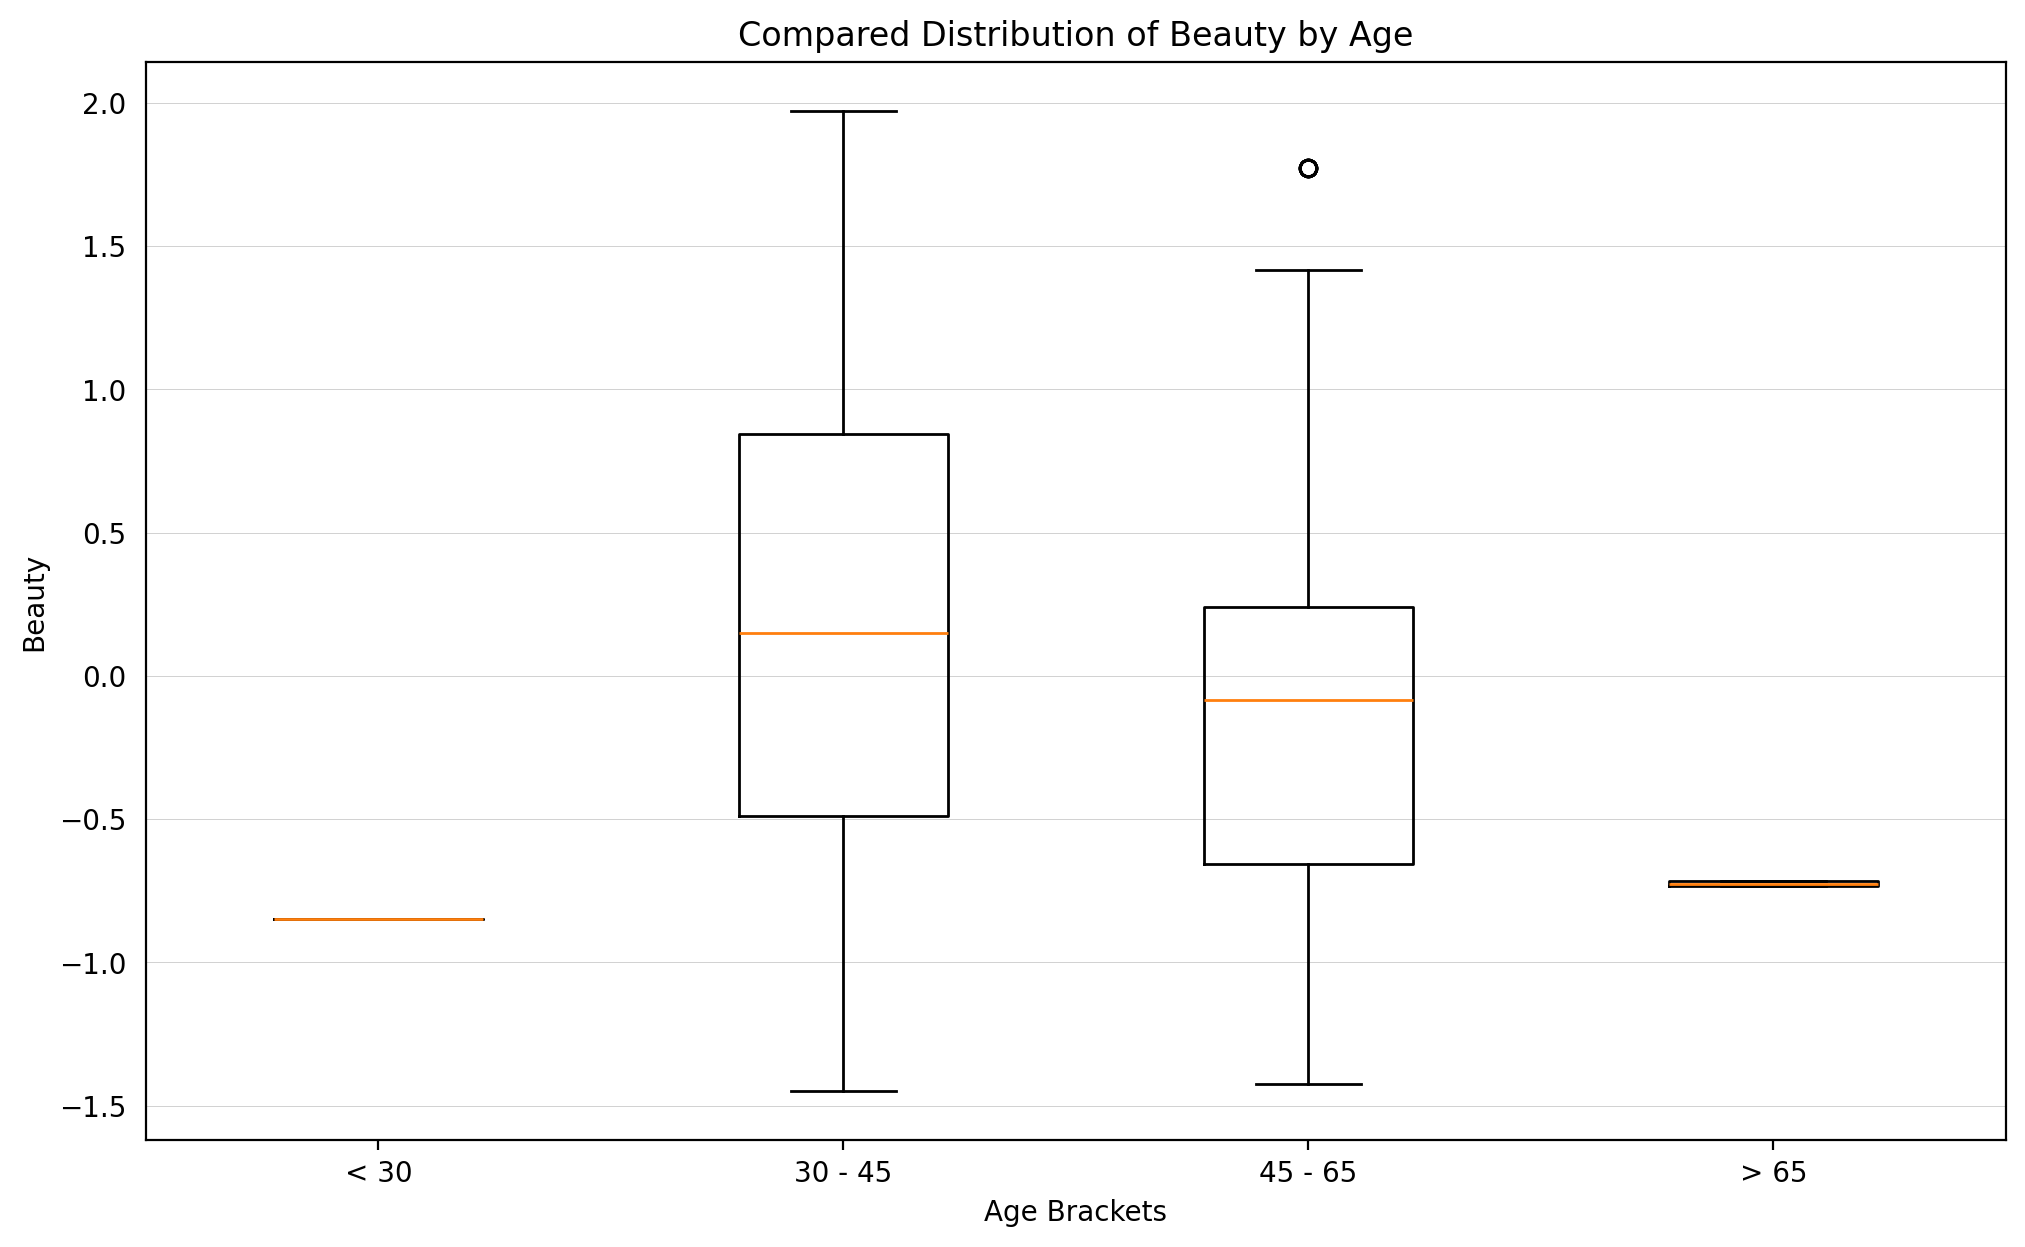

In [45]:
age1 = beautydf.loc[beautydf["Age Brackets"] == "< 30"]["beauty"] 
age2 = beautydf.loc[beautydf["Age Brackets"] == "30 - 45"]["beauty"]  
age3 = beautydf.loc[beautydf["Age Brackets"] == "45 - 65"]["beauty"] 
age4 = beautydf.loc[beautydf["Age Brackets"] == "> 65"]["beauty"]  

  
# Visualize petal length distribution for all species  
fig, ax = plt.subplots(figsize=(12, 7))  
  
# Remove y-axis tick marks  
ax.yaxis.set_ticks_position("none")  
# Add major gridlines in the y-axis  
ax.grid(color="grey", axis="y", linestyle="-", linewidth=0.25, alpha=0.5)  
# Set plot title  
ax.set_title("Compared Distribution of Beauty by Age")  
plt.xlabel("Age Brackets")  
plt.ylabel("Beauty")  
# Set names as labels for the boxplot  
dataset = [age1, age2, age3, age4]  
labels = beautydf["Age Brackets"].unique()  
ax.boxplot(dataset, labels = ["< 30", "30 - 45", "45 - 65", "> 65"])  
plt.show()